# 1. Load the dataset

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# 2. Visualize the dataset

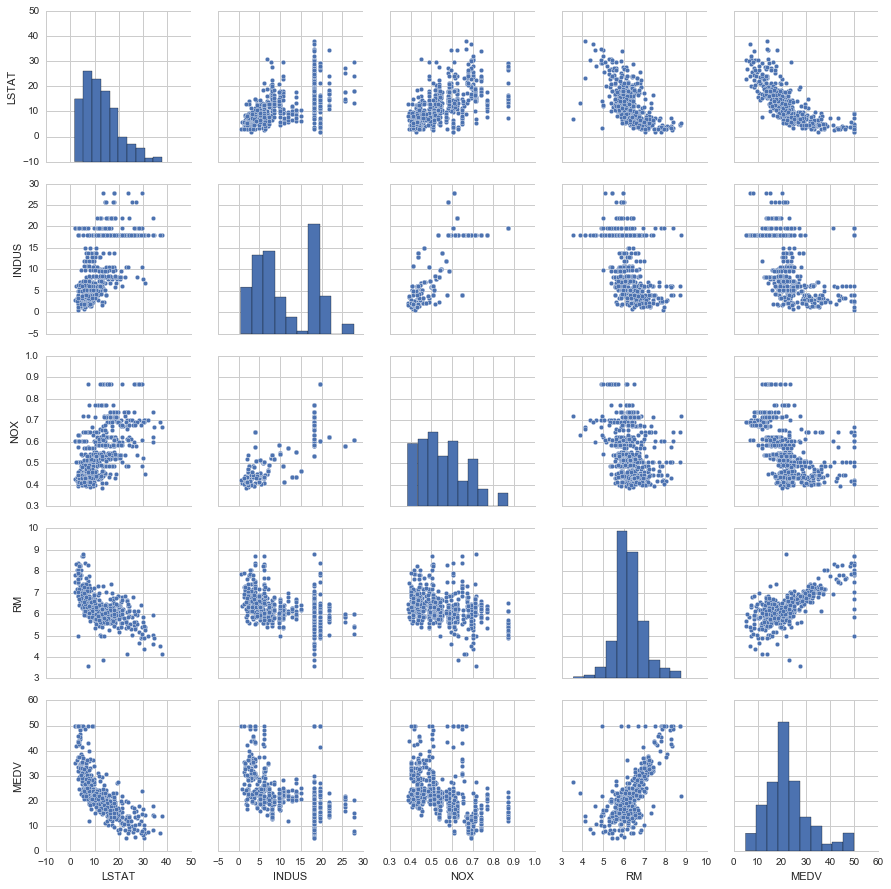

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', context = 'notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size =2.5)
plt.show()

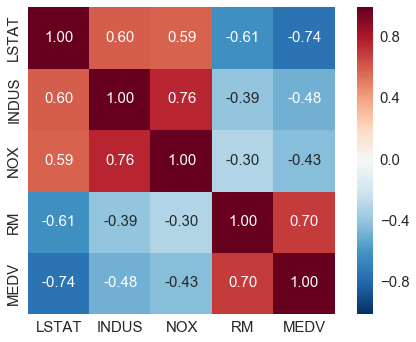

In [4]:
import numpy as np
# correlation matrix
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)

# heatmap
hm = sns.heatmap(cm, cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

# 3. Fit with linear regression

/Users/weiyangli/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/weiyangli/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


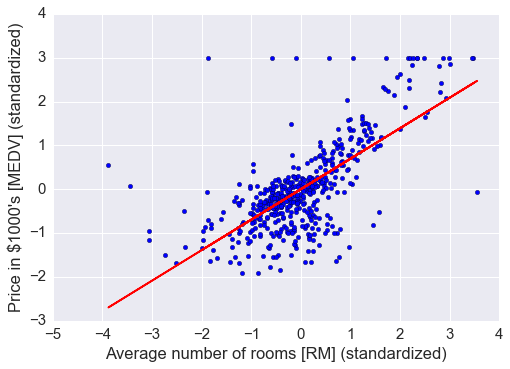

Normalized Slope: 0.695
Normalized Intersept: -0.000


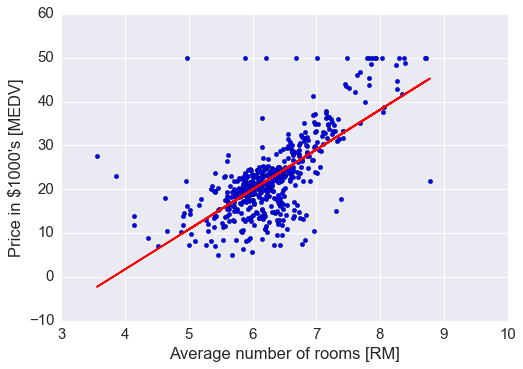

Slope: 9.102
Intersept: -34.671


In [5]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegression()
lr.fit(X_std, y_std)

def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red')
    return None

lin_regplot(X_std,y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()


print('Normalized Slope: %.3f' % lr.coef_)
print('Normalized Intersept: %.3f' % lr.intercept_)


lr.fit(X, y)
lin_regplot(X,y, lr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

print('Slope: %.3f' % lr.coef_)
print('Intersept: %.3f' % lr.intercept_)


### 3.1 Deal with outlier with Random Sampling Consecus

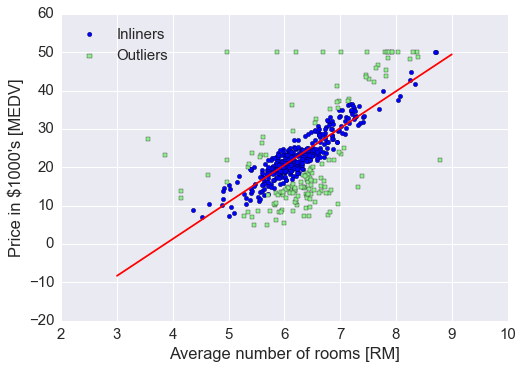

Slope: 9.621
Intersept: -37.137


In [44]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), max_trials = 100, min_samples = 50, residual_threshold = 5,residual_metric=lambda x: np.sum(np.abs(x), axis=1),random_state=0)
ransac.fit(X,y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y = ransac.predict(line_X[:,np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker = 'o', label='Inliners')
plt.scatter(X[outlier_mask], y[outlier_mask],c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()


print('Slope: %.3f' % ransac.estimator_.coef_)
print('Intersept: %.3f' % ransac.estimator_.intercept_)

# 4. Evaluate the performance

### 4.1 Residual plot

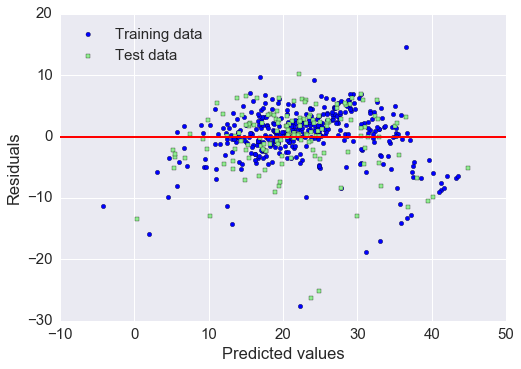

In [12]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:,:-1]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train,c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

### 4.2 Mean Squared Error

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE Train: %.3f,  Test: %.3f' % (mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test, y_test_pred)))
print('R2 Train: %.3f,  Test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

# r2_score(y_true, y_pred)
# as you can see, the model suffers from overfitting

MSE Train: 19.958,  Test: 27.196
R2 Train: 0.765,  Test: 0.673


# 5. Optimize the model 

### 5.1 Use regulation to deal with overfitting

In [60]:
# Use regulation

from sklearn.linear_model import Ridge,Lasso, ElasticNet
lasso = Lasso(alpha =0.01)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('MSE Train: %.3f,  Test: %.3f' % (mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test, y_test_pred)))


MSE Train: 19.995,  Test: 27.387


### 5.2 Add polynominal terms to deal with nonlinearity

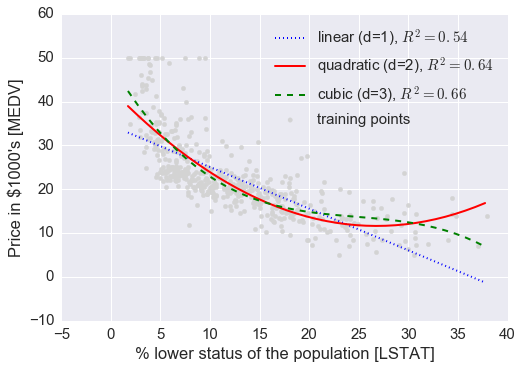

In [65]:
# add polynominal terms
from sklearn.preprocessing import PolynomialFeatures

X = df[['LSTAT']].values
y = df['MEDV'].values

# create polynomial features
quadratic = PolynomialFeatures(degree =2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)


regr = LinearRegression()
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]


# linear fit
regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))


# quadratic fit
regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# cubic fit
regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


plt.scatter(X, y,label='training points',color='lightgray')
plt.plot(X_fit, y_lin_fit,label='linear (d=1), $R^2=%.2f$'% linear_r2,color='blue',lw=2,linestyle=':')
plt.plot(X_fit, y_quad_fit,label='quadratic (d=2), $R^2=%.2f$'% quadratic_r2, color='red',lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit,label='cubic (d=3), $R^2=%.2f$'% cubic_r2,color='green',lw=2,linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')
plt.show()

### Note that PCA, LDA and KPCA are used for classification
    PCA - unsupervised + linear
    LDA - supervised + linear
    KPCA - non-linear

# 6. Use Random Forest to deal with Nonlinearity

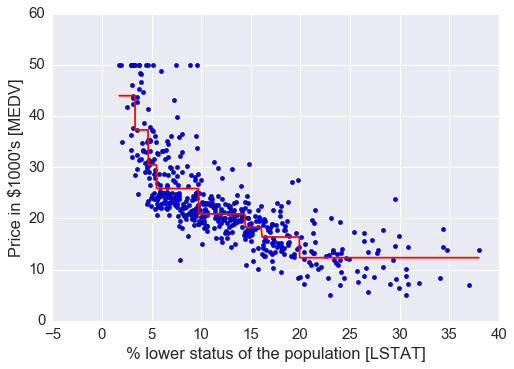

In [10]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()


# Play with the tree depth and see how the model overfits/underfits the data

In [20]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.4,random_state=1)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))


# RF still overfits the data


MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878


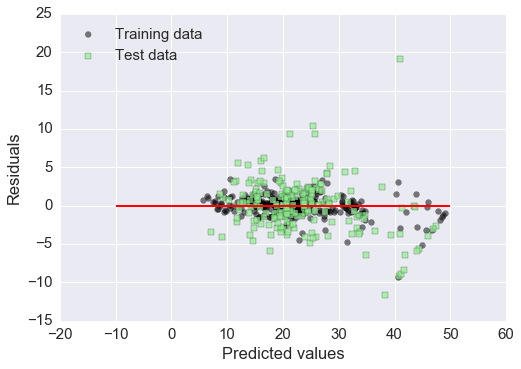

In [21]:
plt.scatter(y_train_pred,y_train_pred - y_train, c='black',marker='o',s=35,alpha=0.5,label='Training data')
plt.scatter(y_test_pred,y_test_pred - y_test,c='lightgreen',marker='s',s=35,alpha=0.7,label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.show()